In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

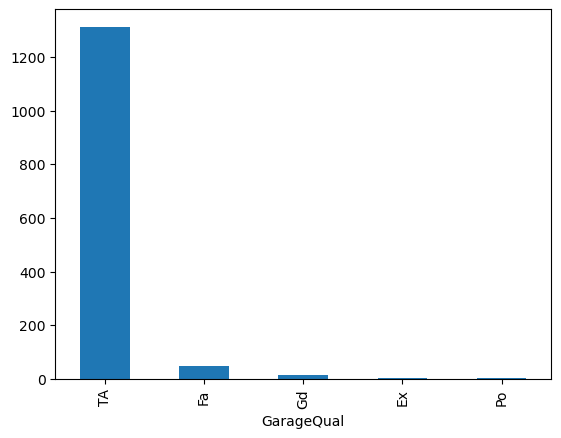

In [5]:
df['GarageQual'].value_counts().plot(kind='bar')

In [6]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

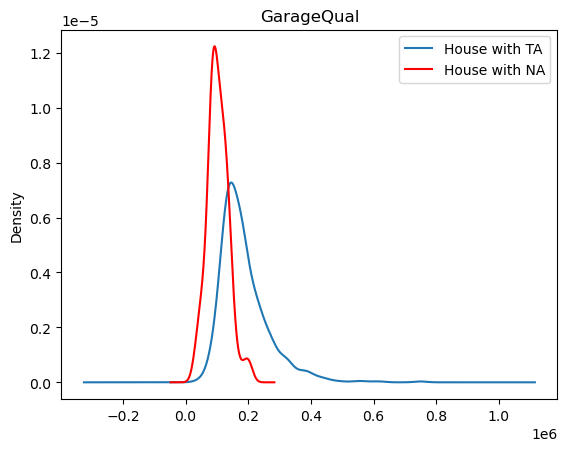

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde',ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['House with TA','House with NA']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

In [10]:
temp= df[df['GarageQual'] == 'TA']['SalePrice']

In [11]:
df['GarageQual'].fillna('TA',inplace=True)

Text(0.5, 1.0, 'GarageQual')

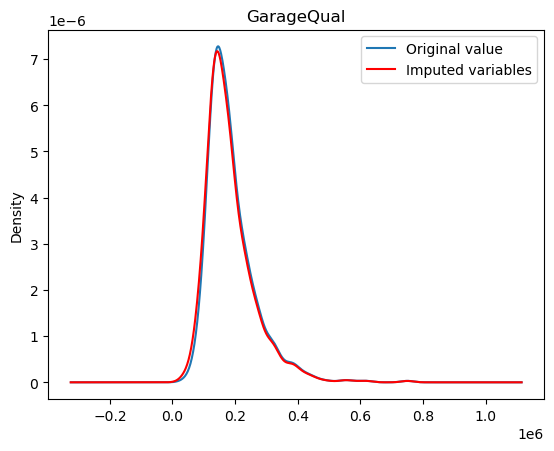

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

## distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde',ax=ax,color ='red')



lines,labels = ax.get_legend_handles_labels()
labels = ['Original value','Imputed variables']
ax.legend(lines,labels,loc='best')

## add title
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

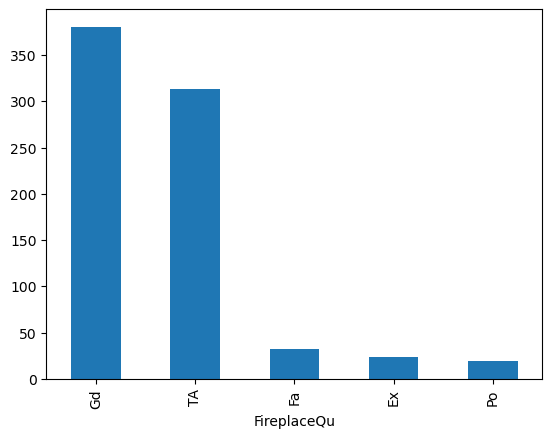

In [15]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [17]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

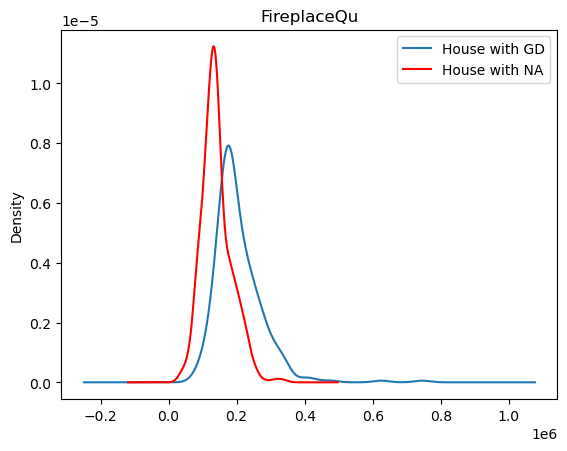

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu'] == 'TA']['SalePrice'].plot(kind='kde',ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['House with GD','House with NA']
ax.legend(lines,labels,loc='best')
plt.title('FireplaceQu')

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size = 0.2)

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
imputer = SimpleImputer(strategy='most_frequent')

In [23]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)

In [24]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)